<a href="https://colab.research.google.com/github/Rohanjos97/data-mining-asignments/blob/IPL_dataset/IT496_Introduction_to%20Data_Mining%20_Lab%20Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Analysis

## 1. (T0) Explore the dataset assigned to your team and provide:




In [222]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [223]:
# read the csv data
df= pd.read_csv("/content/IPL_data/IPL Ball-by-Ball 2008-2020 - IPL Ball-by-Ball 2008-2020.csv")

# getting outline of the dataset
df.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


### a) Summary of the Dataset 
Includes information about columns, attribute types, null values(if any), and summary of each attribute.

#### By looking at every column of the given dataset(IPL Ball-by-Ball 2008-2020), we can clearly understand the data above and summarize it as shown below

##### The dataset consists of 18 columns which describes following properties
										
- id: The match ids to uniquely identify each match.

- inning: The division of a match into two parts, during which one team takes its turn to bat/ball.

- over: Describes the current over being dealth.

- ball: The ball no. of the current over.

- batsman: The player who is currently batting.

- non_striker: The non-batting player who is on the opposing crease.

- bowler: The player who is currently bowling.

- batsman_runs: Run taken by batsman in that particular ball.

- extra_runs: The run(s) scored by or awarded to the batting team which is not credited to any individual batsman.

- total_runs: Total runs scored in a ball, i.e, batsman_runs + extra_runs.

- non_boundary: To indicate if a boundary occured in the ball.

- is_wicket: Indicates if the wicket was taken during that ball.

- dismissal_kind: Type of dismissal that dismissed the batsman.

- player_dismissed: The player who is dismissed.

- fielder: The non-bowler player who dismissed the batsman.

- extras_type: Type of extra runs that was awarded.

- batting_team: The team who is currently batting. 

- bowling_team: The team who is currently bowling. 

#### Lets have a look into different attributes of the given dataset

- dtypes: Datatype of each column.
- size: Product of no. of rows * no. of columns.
- shape: Displays the total number of rows and columns for a particular dataframe.
- empty: Checks whether the dataframe is empty or not.
- isnull: Displays True for every null value, and false otherwise.


In [224]:
# overview of given dataset - a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [225]:
# Range Index: range of tuples  
# Index: name of each column
df.axes

[RangeIndex(start=0, stop=193468, step=1),
 Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
        'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
        'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
        'batting_team', 'bowling_team'],
       dtype='object')]

In [226]:
# Datatype of every column 
df.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [227]:
# Product of no. of rows * no. of columns
df.size

3482424

In [228]:
# Displays the total number of rows and columns for a particular dataframe
df.shape

(193468, 18)

In [229]:
# Checks whether the dataframe is empty or not
df.empty

False

In [230]:
# Get a count of null values present in the dataframe
df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

### b) Plots (graphs, histograms, pie charts) summarizing insights about the dataset.

## 2. (T0) List data preprocessing, and normalization/standardization techniques that you think should be the most suitable to your dataset.

#### During our investigation, we noted following observations:

1. few teams have same name but slightly modified details, eg "Rising Pune Supergiants" and "Rising Pune Supergiant" (Notice the 's' at the end of second team name's which is missing in the latter one).

In [231]:
# Since batting_team have non-null values let us check the teams mentioned in batting_team.
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

 2. The 'bowling_team' attribute have some null values(0.001%) that needs to be taken care of.

 3. For approx. 183973 out of 193468 entries(95.09%), the data for dismissal_kind, player_dismissed, fielder, extras_type is missing(NULL/empty).

In [232]:
null_values = df.isnull().sum()
print(null_values)

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64


### Data Pre-Processing and Cleaning

#### Out of the 4 major preprocessing techniques, we have used following techniques to make our data usable:

##### 1. **Data Cleaning**

We have used **data cleaning to remove inconsistencies** in the batting_team column. We can do this process manually because the team names does not contain a large amount of data.

###### **1**: 'Delhi Capitals' and 'Delhi Daredevils' is the same team since both of them represent Delhi.

In [233]:
df =df.replace(['Delhi Daredevils'],'Delhi Capitals')
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

###### **2:** For the missing values in 'player_dismissed' and 'dismissal_kind', we will use the **global constant** "NA" value as "Not Out" in our case. We could have considered replacing it with 0, but the data is already being stored as string datatype. So, to make the data more readable, we are not using 0 to indicate 'Not Out' as it increases the readability for users.

In [234]:
df['dismissal_kind'].fillna(value ="Not Out",inplace=True)
df['player_dismissed'].fillna(value ="Not Out",inplace=True)

##### 2. **Data Reduction**

###### **1:** Using **numerosity reduction** to remove the old teams like 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors' , 'Rising Pune Supergiants'.
We know that 'Rising Pune Supergiants' played only for 1 season; other teams such as 'Pune warriors', 'Deccan Chargers' do not play anymore. **We do not have sufficient data about these teams to compare with other teams who have been in the league for a longer period of time**.

In [235]:
required_team=['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
        'Gujarat Lions']

# extracting only the required teams according to pre-processed data
df = df[(df['batting_team'].isin(required_team)) & (df['bowling_team'].isin(required_team))]

###### **2:** On removing the old teams & teams that do not play anymore, it also solved our problem of null value present in bowling team

In [236]:
# lets analyse the percentage of the values that are empty
df.isnull().mean()*100

id                   0.000000
inning               0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
non_boundary         0.000000
is_wicket            0.000000
dismissal_kind       0.000000
player_dismissed     0.000000
fielder             96.522980
extras_type         94.702847
batting_team         0.000000
bowling_team         0.000000
dtype: float64

###### **3:** Using the principles of **dimensionality reduction**, we are droping columns "extras_type" and "fielder" as it will not affect our analysis. 

In [237]:
df.drop(['extras_type','fielder'],axis=1,inplace=True)

#####After completing the Data Pre-Processing tasks, our data looks like this

In [238]:
df.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
batting_team        0
bowling_team        0
dtype: int64

## 3. (T1) List any correlated attributes in your dataset.
Let us do some analysis on our data and try to find interesting correlation attributes in given data

#### 1: Top 10 batsmen based on strike rate. [Strike Rate = (total run scored by batsman/ total balls faced by batsman) * 100]

In [239]:
total_runs = df.groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs': 'total_runs'})
balls_faced = df.groupby('batsman')['ball'].count().reset_index().rename(columns={'ball': 'total_balls_faced'})

# merging the above two table
strike_rate_data = pd.merge(total_runs, balls_faced, how='inner', on='batsman')

# adding a new column, strike_rate, to our new dataframe
strike_rate_data['strike_rate'] = strike_rate_data['total_runs']/strike_rate_data['total_balls_faced']*100
strike_rate_data.sort_values(by='total_runs', ascending=False).head(10).reset_index().drop('index',axis=1)

,batsman,total_runs,total_balls_faced,strike_rate
0,V Kohli,5122,4027,127.191458
1,DA Warner,4800,3484,137.772675
2,SK Raina,4761,3564,133.585859
3,AB de Villiers,4320,2890,149.480969
4,CH Gayle,4268,3072,138.932292
5,S Dhawan,3972,3201,124.086223
6,G Gambhir,3710,3092,119.987063
7,MS Dhoni,3619,2645,136.824197
8,RG Sharma,3572,2778,128.581713
9,SR Watson,3509,2643,132.765796


In [240]:
# Checking correlation in strike rate table
strike_rate_data.corr()

,total_runs,total_balls_faced,strike_rate
total_runs,1.000000,0.996455,0.310620
total_balls_faced,0.996455,1.000000,0.298703
strike_rate,0.310620,0.298703,1.000000


#####correlation:
- total_runs have correlation of **0.996** with total_balls_faced. With increase in no. of balls faced by batsman, there is an increase in batsman_runs.

#### 2: Top 10 batsmen based on the total no. of 6's scored

In [241]:
six = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().rename(columns={'batsman_runs': 'no. of 6\'s'})

# Comparing total runs scored with total 6's score
six['total_6_score'] = six['no. of 6\'s']*6
comparison_data_on_6 = pd.merge(six, strike_rate_data, how='inner', on='batsman')

comparison_data_on_6.sort_values(by='no. of 6\'s',ascending =False).head(10).reset_index().drop('index',axis=1)

,batsman,no. of 6's,total_6_score,total_runs,total_balls_faced,strike_rate
0,CH Gayle,302,1812,4268,3072,138.932292
1,AB de Villiers,207,1242,4320,2890,149.480969
2,KA Pollard,189,1134,2847,1961,145.181030
3,MS Dhoni,174,1044,3619,2645,136.824197
4,SK Raina,174,1044,4761,3564,133.585859
5,V Kohli,172,1032,5122,4027,127.191458
6,DA Warner,172,1032,4800,3484,137.772675
7,SR Watson,170,1020,3509,2643,132.765796
8,RG Sharma,142,852,3572,2778,128.581713
9,AD Russell,127,762,1500,870,172.413793


In [242]:
comparison_data_on_6.corr()

,no. of 6's,total_6_score,total_runs,total_balls_faced,strike_rate
no. of 6's,1.000000,1.000000,0.925760,0.899808,0.322722
total_6_score,1.000000,1.000000,0.925760,0.899808,0.322722
total_runs,0.925760,0.925760,1.000000,0.996455,0.310620
total_balls_faced,0.899808,0.899808,0.996455,1.000000,0.298703
strike_rate,0.322722,0.322722,0.310620,0.298703,1.000000


#####correlation:
1. no. of 6's have correlation of **0.8998** with total balls faced by batsman. As the batsman faces more balls, he gets comfortable in the ptich resulting in hitting more 6's.

2. no. of 6's have correlation of **0.9257** with total runs scored by batsman. Meaning, with the increase in 6's, total runs scored by the player also increases significantly. Hence, high risk yields higher rewards.

#### 3: Top 10 batsmen based on the total no. of 4's scored

In [243]:
four = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().rename(columns={'batsman_runs': 'no. of 4\'s'})

# Comparing total runs scored with total 4's score
four['total_4_score'] = four['no. of 4\'s']*4
comparison_data_on_4 = pd.merge(four, strike_rate_data, how='inner', on='batsman')

comparison_data_on_4.sort_values(by='no. of 4\'s',ascending =False).head(10).reset_index().drop('index',axis=1)

,batsman,no. of 4's,total_4_score,total_runs,total_balls_faced,strike_rate
0,DA Warner,470,1880,4800,3484,137.772675
1,S Dhawan,461,1844,3972,3201,124.086223
2,SK Raina,444,1776,4761,3564,133.585859
3,V Kohli,443,1772,5122,4027,127.191458
4,G Gambhir,439,1756,3710,3092,119.987063
5,AB de Villiers,349,1396,4320,2890,149.480969
6,CH Gayle,348,1392,4268,3072,138.932292
7,SR Watson,344,1376,3509,2643,132.765796
8,RV Uthappa,337,1348,3335,2564,130.070203
9,KD Karthik,334,1336,3360,2649,126.840317


In [244]:
comparison_data_on_4.corr()

,no. of 4's,total_4_score,total_runs,total_balls_faced,strike_rate
no. of 4's,1.000000,1.000000,0.983972,0.986758,0.296872
total_4_score,1.000000,1.000000,0.983972,0.986758,0.296872
total_runs,0.983972,0.983972,1.000000,0.996455,0.310620
total_balls_faced,0.986758,0.986758,0.996455,1.000000,0.298703
strike_rate,0.296872,0.296872,0.310620,0.298703,1.000000


#####correlations:
<br><br>
1.a) no. of 4's have correlation of **0.9837** with total balls faced by batsman. As the batsman faces more balls, he gets comfortable in the ptich resulting in hitting more 6's.

1.b) This value is greater than the one we got for no. of 6's vs total balls faced. Which means it is easier to hit 4's than 6's once a batsman is comfortable in the pitch.

2.a) no. of 4's have correlation of **0.9839** with total runs scored by batsman. Meaning, with the increase in 4's, total runs scored by the player also increases.

2.b) This value is greater than the one we got for no. of 6's vs total runs. Which means it is easier to hit 4's than 6's and the impact of 4's is greater than 6's in the total runs.

4: Top 10 bowlers based on wickets taken (in trivial)

In [245]:
wicket = df.groupby(['bowler'])['is_wicket'].sum().reset_index()
sortedbowl_players = wicket.sort_values(by ='is_wicket',ascending =False).head(10).reset_index().drop('index',axis=1)
sortedbowl_players = sortedbowl_players.rename(columns={'is_wicket': 'wickets taken'})
sortedbowl_players

,bowler,wickets taken
0,DJ Bravo,156
1,SL Malinga,153
2,PP Chawla,150
3,Harbhajan Singh,141
4,SP Narine,132
5,R Ashwin,128
6,UT Yadav,126
7,YS Chahal,123
8,B Kumar,117
9,A Mishra,115


#### 4: Top 10 bowlers based on most innings played

In [246]:
innings = df.groupby('bowler')[['id', 'is_wicket','batsman_runs']].agg(innings=('id', 'nunique'), wickets_taken=('is_wicket', 'sum'), runs_concieved=('batsman_runs', 'sum'))

innings.sort_values(by='innings', ascending=False).head(10).reset_index()

,bowler,innings,wickets_taken,runs_concieved
0,PP Chawla,144,150,3712
1,Harbhajan Singh,140,141,3506
2,RA Jadeja,130,100,2844
3,R Ashwin,123,128,2992
4,DJ Bravo,122,156,3262
5,A Mishra,110,115,2810
6,SP Narine,110,132,2891
7,UT Yadav,107,126,3069
8,SL Malinga,105,153,2853
9,P Kumar,100,82,2566


In [247]:
innings.corr()

,innings,wickets_taken,runs_concieved
innings,1.000000,0.958272,0.985515
wickets_taken,0.958272,1.000000,0.979200
runs_concieved,0.985515,0.979200,1.000000


interesting correlations:

1. wickets_taken have correlation of **0.9792** with runs_concieved. In order to setup more wickets, the bowler have concieved more runs in the process. High risk yields high rewards.

#### 5: Top 10 bowlers based on economy

In [248]:
overs = df.groupby('bowler')[['id','batsman_runs', 'is_wicket','over']].agg(innings=('id', 'nunique'), runs_concieved=('batsman_runs', 'sum'), wicket_taken=('is_wicket', 'sum'), over=('over','count'))
overs['over'] = overs['over']/6

economy = overs
economy['economy'] = (economy['runs_concieved']/(economy['over']))

economy.sort_values(by ='over',ascending =False).head(10).reset_index()

,bowler,innings,runs_concieved,wicket_taken,over,economy
0,Harbhajan Singh,140,3506,141,513.166667,6.832088
1,PP Chawla,144,3712,150,482.000000,7.701245
2,R Ashwin,123,2992,128,455.166667,6.573416
3,SP Narine,110,2891,132,434.833333,6.648524
4,SL Malinga,105,2853,153,426.500000,6.689332
5,DJ Bravo,122,3262,156,423.166667,7.708547
6,UT Yadav,107,3069,126,394.000000,7.789340
7,A Mishra,110,2810,115,393.833333,7.134998
8,RA Jadeja,130,2844,100,374.166667,7.600891
9,P Kumar,100,2566,82,364.000000,7.049451


In [249]:
economy.corr()

,innings,runs_concieved,wicket_taken,over,economy
innings,1.000000,0.985515,0.958272,0.984824,-0.249680
runs_concieved,0.985515,1.000000,0.979200,0.995505,-0.230505
wicket_taken,0.958272,0.979200,1.000000,0.982317,-0.252496
over,0.984824,0.995505,0.982317,1.000000,-0.255340
economy,-0.249680,-0.230505,-0.252496,-0.255340,1.000000


obvious correlation:
1. overs dealth by bowler have a correlation of **0.9823** with wickets taken. As the bowler deals more overs, he gets better understanding on how to take a wicket.


#### Winning team

First, we will calclulate the total runs scored by the teams in each matches played against each other.
<br>
If we look closely, the data in first 2 rows is having same ids but the position of 'batting_team' and 'bowling_team' is interchanged. This will help us determine which batting team scored how many runs against opposing team.

In [250]:
total_runs_in_match = df.groupby(['id','batting_team','bowling_team']).sum()

# we don't need the data about over and inningsn, since our calculation is based on total runs scored by a team.
total_runs_in_match = total_runs_in_match.drop(labels=['inning','over'],axis=1).reset_index()
total_runs_in_match

,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,448,205,17,222,0,3
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,383,63,19,82,0,10
2,335983,Chennai Super Kings,Kings XI Punjab,449,234,6,240,0,5
3,335983,Kings XI Punjab,Chennai Super Kings,449,196,11,207,0,4
4,335984,Delhi Capitals,Rajasthan Royals,358,122,10,132,0,1
...,...,...,...,...,...,...,...,...,...
1307,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,445,122,10,132,0,4
1308,1237180,Delhi Capitals,Sunrisers Hyderabad,455,181,8,189,1,3
1309,1237180,Sunrisers Hyderabad,Delhi Capitals,456,166,6,172,0,8
1310,1237181,Delhi Capitals,Mumbai Indians,441,152,4,156,0,7


Now, to make the winner team's calculation easy, let's split the tuples having same ids into two different dataframes so that we can directly compare the 'total_runs' scored by each team participating in the match.
<br><br>
Here we are spliting the tables by steps of 2 because the data is arranged in the increasing order of id.

In [251]:
df1=pd.DataFrame(total_runs_in_match[::2]).reset_index()
df1

,index,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,448,205,17,222,0,3
1,2,335983,Chennai Super Kings,Kings XI Punjab,449,234,6,240,0,5
2,4,335984,Delhi Capitals,Rajasthan Royals,358,122,10,132,0,1
3,6,335985,Mumbai Indians,Royal Challengers Bangalore,441,154,11,165,0,7
4,8,335987,Kings XI Punjab,Rajasthan Royals,434,162,4,166,0,8
...,...,...,...,...,...,...,...,...,...,...
651,1302,1216547,Mumbai Indians,Royal Challengers Bangalore,456,196,5,201,0,5
652,1304,1237177,Delhi Capitals,Mumbai Indians,465,137,6,143,0,8
653,1306,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,449,127,4,131,0,7
654,1308,1237180,Delhi Capitals,Sunrisers Hyderabad,455,181,8,189,1,3


In [252]:
df2=pd.DataFrame(total_runs_in_match[1::2]).reset_index()
df2

,index,id,batting_team,bowling_team,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,383,63,19,82,0,10
1,3,335983,Kings XI Punjab,Chennai Super Kings,449,196,11,207,0,4
2,5,335984,Rajasthan Royals,Delhi Capitals,434,122,7,129,0,8
3,7,335985,Royal Challengers Bangalore,Mumbai Indians,443,161,5,166,0,5
4,9,335987,Rajasthan Royals,Kings XI Punjab,451,156,12,168,0,4
...,...,...,...,...,...,...,...,...,...,...
651,1303,1216547,Royal Challengers Bangalore,Mumbai Indians,441,191,10,201,0,3
652,1305,1237177,Mumbai Indians,Delhi Capitals,427,196,4,200,0,5
653,1307,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,445,122,10,132,0,4
654,1309,1237180,Sunrisers Hyderabad,Delhi Capitals,456,166,6,172,0,8


Now we can directly comare the two table's 'total_runs' and decide which team won the match.
<br><br>
After calculating the winning team, we can merge the two dataframes again to proceed further.

In [253]:

length = len(df1)

for itr in range (0, length):
  # compare ids of both dataframe to check if same teams are facing off each other
  if(df1.loc[itr, 'id'] == df2.loc[itr, 'id']):
    # Team A wins the game
    if(df1.loc[itr, 'total_runs'] > df2.loc[itr, 'total_runs']):
        winner = df1.loc[itr, 'batting_team']
        df1.at[itr, 'winner'] = winner
        df2.at[itr, 'winner'] = winner
    # Team B wins the game
    elif(df1.loc[itr, 'total_runs'] < df2.loc[itr, 'total_runs']):
        winner = df2.loc[itr, 'batting_team']
        df2.at[itr, 'winner'] = winner
        df1.at[itr, 'winner'] = winner

    else:
        df1.at[itr, 'winner'] = 'Draw'
        df2.at[itr, 'winner'] = 'Draw'

# merging the two tables again
winner_team_data = pd.merge(df1, df2, how= 'outer')
winner_team_data['won_by']= abs(df1['total_runs']-df2['total_runs'])

winner_team_data = winner_team_data.drop(labels=['ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket'], axis=1).drop('index',axis=1)
winner_team_data = winner_team_data.rename(columns={'batting_team': 'Team A', 'bowling_team': 'Team B'})
winner_team_data

,id,Team A,Team B,winner,won_by
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140.0
1,335983,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,33.0
2,335984,Delhi Capitals,Rajasthan Royals,Delhi Capitals,3.0
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,1.0
4,335987,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,2.0
...,...,...,...,...,...
1307,1216547,Royal Challengers Bangalore,Mumbai Indians,Draw,NaN
1308,1237177,Mumbai Indians,Delhi Capitals,Mumbai Indians,NaN
1309,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,NaN
1310,1237180,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,NaN


In [254]:
most_winning_teams = winner_team_data.groupby(['winner'])['winner'].count()
most_winning_teams = most_winning_teams.drop('Draw')
most_winning_teams

winner
Chennai Super Kings            190
Delhi Capitals                 146
Gujarat Lions                   20
Kings XI Punjab                144
Kolkata Knight Riders          166
Mumbai Indians                 210
Rajasthan Royals               134
Royal Challengers Bangalore    150
Sunrisers Hyderabad            126
Name: winner, dtype: int64

# Formulating an ML Problem

## 4. (T1) List some interesting machine learning problems (classification, regression, clustering, etc.) on your assigned dataset. If you were to design a product/service to solve the problem, who would be the interested parties/stakeholders?

### K-means or DBSCAN Clustering algorithm can make clusters of players based on derived features, strike rate, economy, total runs by batsman, and total wickets by the bowler. We will make categories of overs so that it will quickly identify which batsman performs best in a given category(for example, the batters who perform best in over 0 to 5 will be clustered together for the openers category). We will make clusters like top-order batsmen(openers), middle-order batsmen, dead bowlers, etc. These clusters will help select the right player for a given situation. And if we get information about the auctioned price of the player, we can do further clustering of groups (for example, for the openers cluster, if we make other cluster based on the auctioned price, we cluster openers by auctioned price so the budget of the team will also be considered for selecting players). And by using auctioned prices, we can use a regression algorithm to predict the next auction price. This information will be deemed while choosing the player and bidding in the auction.

<br>

### Winning is the ultimate goal in any game. The selection of the best players in a team is not only the key to overall team performance, but it is also vital to train the team chosen by the selectors to convert a match into a higher probability of winning. Hence it will be easier for the coaches to not only determine the squad but also to train the team on their weaknesses (or) devise a strategy to hunt down the opponents with their shortcomings.

<br>

###One crucial factor in an in-match game is the decision made by the coach or captain, like selecting a suitable player as per the situation or which bowler is more appropriate. These small things can quickly turn the tables upside down, and we all have witnessed the same in the IPL. Hence our stakeholders would-be coaches and the captains of the IPL teams.

# Apriori Algorithm

## 5. (T1) Implement the Apriori algorithm and use it to mine sets that are frequent on your
assigned dataset. Set minimum support (minsup) to 0.01, 0.02, 0.05, 0.08, and show the
list of most frequent patterns.

# Trivial/ Fun Facts

Lets have a quick look at our data before proceeding further

In [255]:
df.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Not Out,Not Out,Kolkata Knight Riders,Royal Challengers Bangalore


### 1. Innings

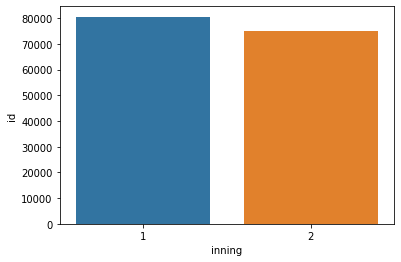

In [256]:
INNINGS = df.groupby('inning').count()['id']
INNINGS = INNINGS.to_frame().reset_index()

sns.barplot(x='inning', y='id', data=INNINGS)

From the above graph, we can deduct that there is some difference between total games played in inning 1 vs inning 2. Which could mean that, due to some unforseenable circumstances, such as bad weather, the match was not played between few teams.

### 2. Longest over in IPL

In [257]:
#highest ball thrown in an over
HIGHEST_BALL_IN_AN_OVER = df.groupby('ball').nunique().reset_index()
result = HIGHEST_BALL_IN_AN_OVER['ball'].count()
print(f'The longest over in IPL had {result} balls')

The longest over in IPL had 9 balls


### 3. Dismissal trend

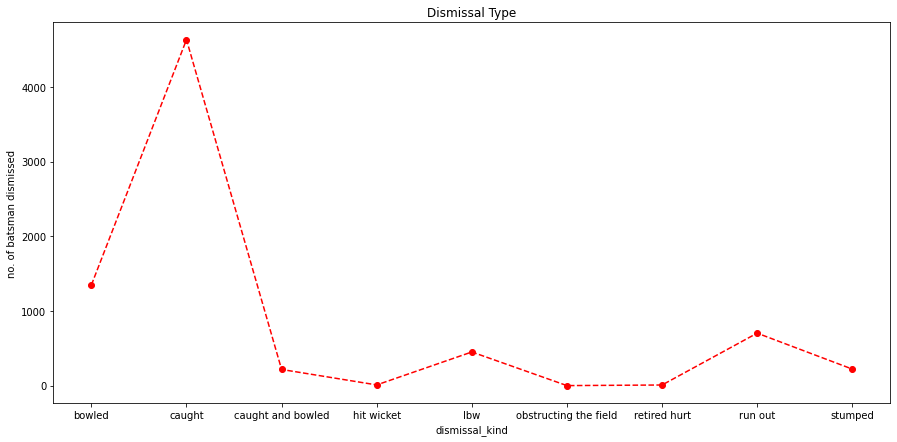

In [258]:
#dismissal type  
dismissal = df.groupby('dismissal_kind').count().reset_index()
# index 0 contains Not Out, which is not dismissal, so we will take all dismissal type except Not Out
dismissal = dismissal.loc[1:10]

fig, axes = plt.subplots(figsize=(15,7))
axes.plot(dismissal['dismissal_kind'],dismissal['id'],'r--o')
axes.set_xlabel('dismissal_kind')
axes.set_ylabel('no. of batsman dismissed')
axes.set_title('Dismissal Type');

From the trend above, we can determine that most players are dismissed by fielding catching the ball, followed by being bowled from the bowler.

### 4.[**WORKING ON IT**]

In [283]:
player_dismissed = df[['id','batsman','non_striker','player_dismissed']]
player_dismissed

player_dismissed = player_dismissed[player_dismissed['player_dismissed'].isin(['Not Out'])][['id','batsman','non_striker','player_dismissed']]
print(player_dismissed['player_dismissed'].nunique())
# player_dismissed
# finishers = player_dismissed[player_dismissed['batsman'] != player_dismissed['player_dismissed']]#[['id','batsman']]
# finishers.rename(columns={'batsman':'finisher'},inplace=True)
# finishers = finishers['finisher'].value_counts()[:15]
# finishers

1
